In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, kstest, mannwhitneyu, ttest_ind, levene, kruskal
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, classification_report
from sklearn.utils import shuffle
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

# Анализ и предобработка данных

In [5]:
df = pd.read_csv('credit_scoring.csv')
df.drop('client_id', axis=1, inplace = True)

In [6]:
df

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [7]:
df['Delinquent90'] = df['Delinquent90'].astype(bool)

In [8]:
df.shape

(75000, 10)

In [9]:
df.duplicated().sum()

17

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe()

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit
count,74983.000000,74983.000000,74983.000000,74983.000000,73069.000000,74983.000000,74983.000000,6.015200e+04,74983.000000
mean,353.340383,52.594744,8.451276,1.016924,0.756121,0.428417,0.248056,6.740171e+03,6.277619
std,2117.470748,14.867025,5.156017,1.124042,1.108180,4.276919,4.239965,1.422885e+04,267.773654
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.176160,41.300000,5.000000,0.000000,0.000000,0.000000,0.000000,3.421364e+03,0.029748
50%,0.366924,52.200000,8.000000,1.000000,0.000000,0.000000,0.000000,5.424589e+03,0.153859
75%,0.863070,63.100000,11.000000,2.000000,1.000000,0.000000,0.000000,8.291619e+03,0.560731
max,332600.272820,109.800000,56.000000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533


## Обработка пропусков

In [12]:
df.isna().sum()

DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1914
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14831
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64

In [13]:
df['Income_to_cat'] = df['Income'].fillna(-1)
bins_income = [-1,0,10000,100000,10000000]
lab_inc =['uknown','low', 'medium', 'high']
df['Income_to_cat'] = pd.cut(df['Income_to_cat'],bins = bins_income, labels = lab_inc, include_lowest=True)
df.dropna(subset = 'Income', inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_8780\3873908584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_to_cat'] = df['Income'].fillna(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_8780\3873908584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income_to_cat'] = pd.cut(df['Income_to_cat'],bins = bins_income, labels = lab_inc, include_lowest=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8780\3873908584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

У дохода почти 15тыс пропусков, заменять их будет некорректно, поэтому удалим эти строки из датасета

In [14]:
df.isna().sum()

DIR                      0
Age                      0
NumLoans                 0
NumRealEstateLoans       0
NumDependents            0
Num30-59Delinquencies    0
Num60-89Delinquencies    0
Income                   0
BalanceToCreditLimit     0
Delinquent90             0
Income_to_cat            0
dtype: int64

In [15]:
for col in df.columns:
    n = df[col].nunique()
    print(f'{col}: {n}')

DIR: 56371
Age: 507
NumLoans: 55
NumRealEstateLoans: 24
NumDependents: 13
Num30-59Delinquencies: 16
Num60-89Delinquencies: 11
Income: 59346
BalanceToCreditLimit: 52486
Delinquent90: 2
Income_to_cat: 4


In [16]:
float_features = ['DIR', 'Age', 'BalanceToCreditLimit', 'Income']
int_features = ['NumLoans', 'NumRealEstateLoans', 'NumDependents', 'Num30-59Delinquencies', 'Num60-89Delinquencies']
num_features = float_features + int_features
cat_features = 'Income_to_cat'
target = 'Delinquent90'

In [17]:
df[target].value_counts() # Сильный дисбаланс классов

False    55966
True      4186
Name: Delinquent90, dtype: int64

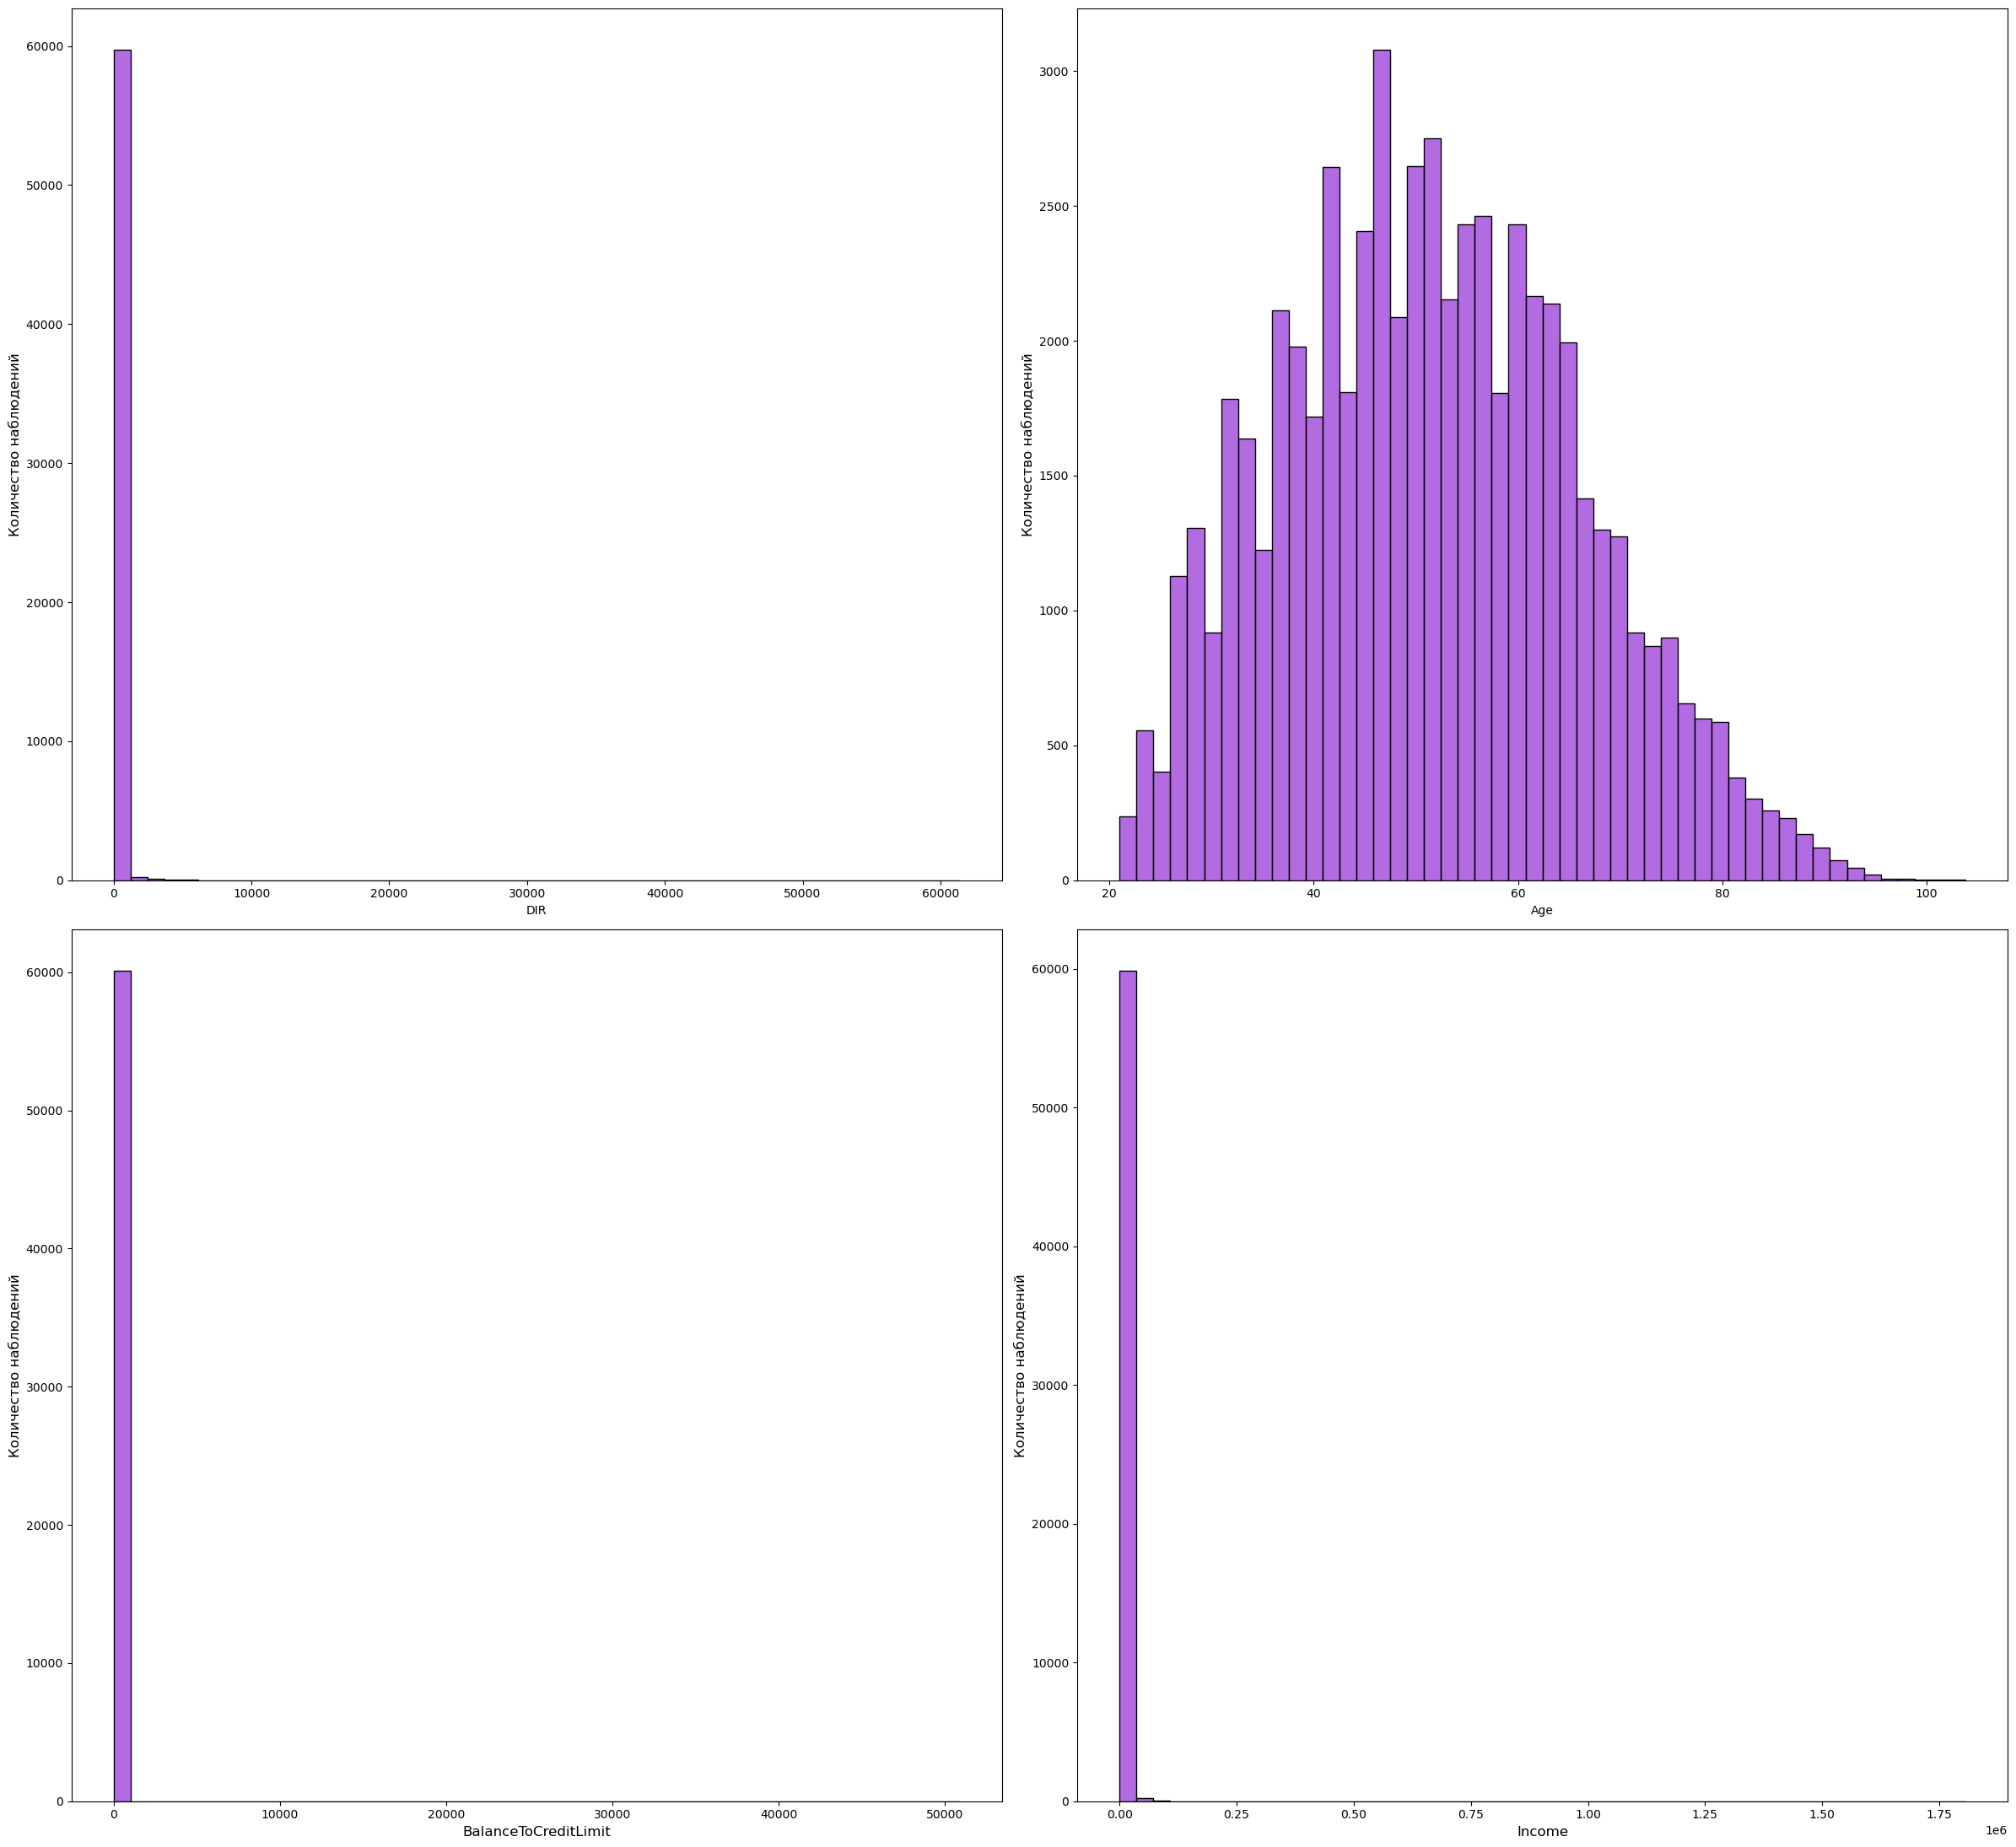

In [18]:
k = 0
m = 2
fig, axes = plt.subplots(m, m, figsize=(24, 22))

for i, ax in enumerate(axes.flat):
    if i >= len(float_features):
        break
    sns.histplot(ax=ax, data=df, x=float_features[i], color='#9939d6', bins = 50)
    ax.set_ylabel('Количество наблюдений', fontsize=12)
    if i >= m * (m - 1):  # Set x-label only for the bottom row
        ax.set_xlabel(float_features[i], fontsize=12)

plt.tight_layout()
plt.show()

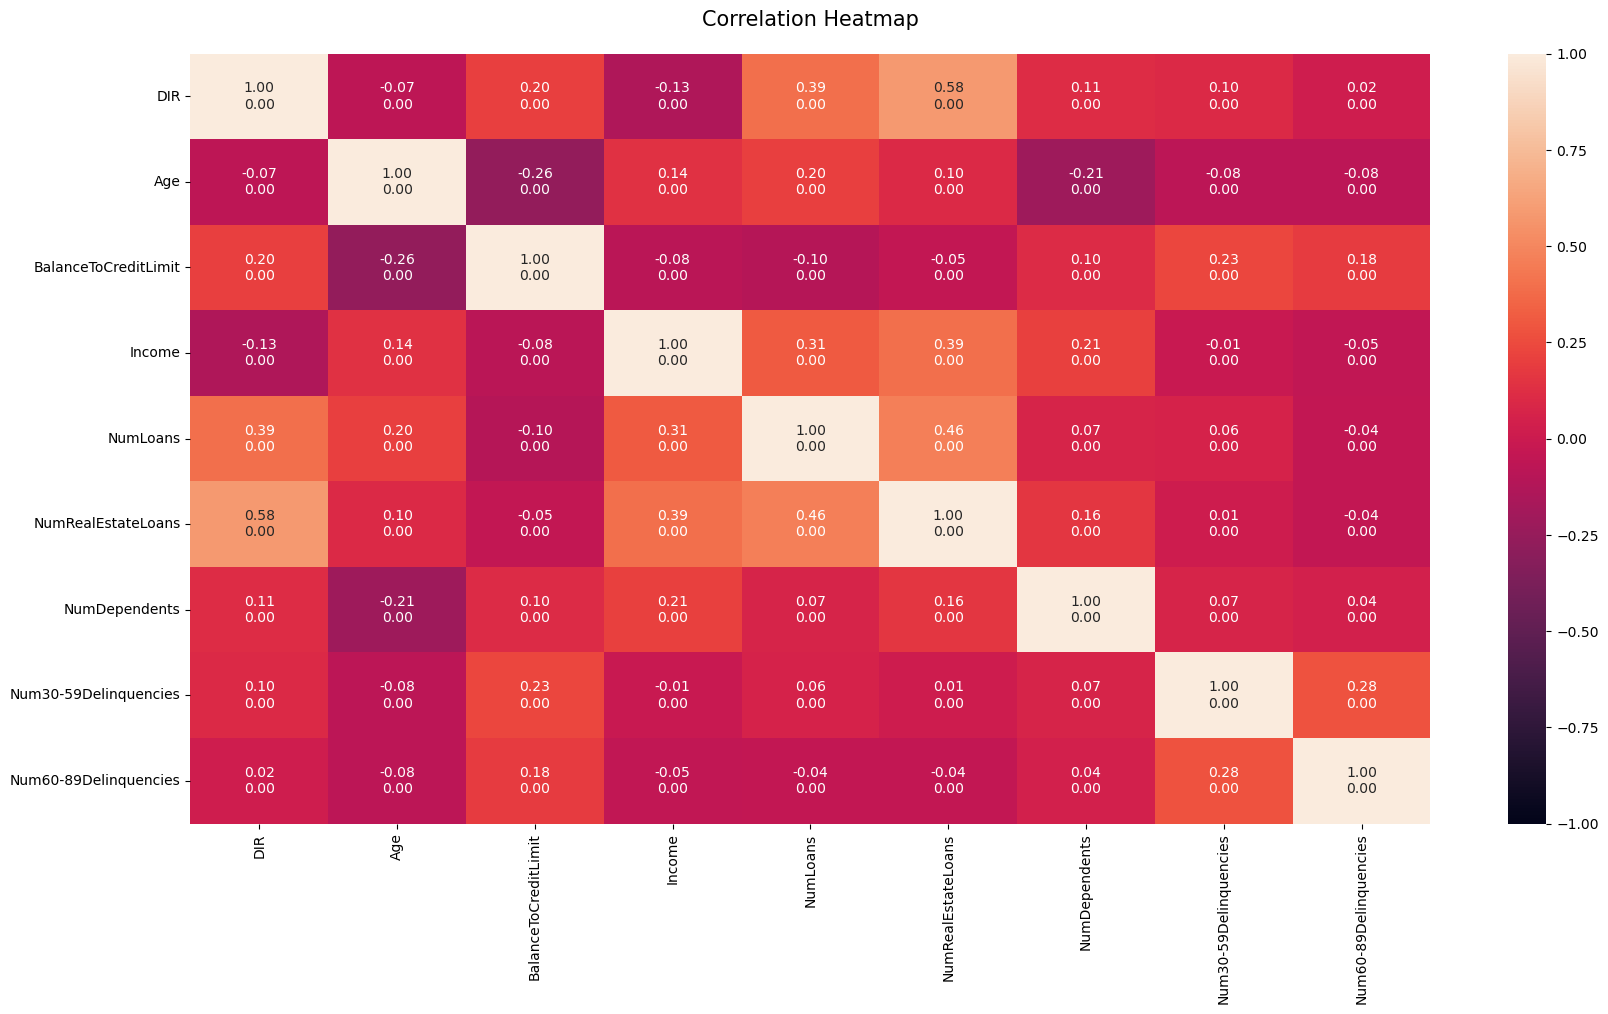

In [19]:
correlation = df[num_features].corr(method = 'spearman')
table = [[spearman_test(df[i], df[j]) for i in num_features] for j in num_features]
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=table, fmt='' )
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':15}, pad=20);

Сильной мультиколлинеарности не обнаружено

**Критерий Левина** Н0: Дисперсии равны   
**Критерий Манна-Уитни** Н0: Средние/медианы равны

In [20]:
result = {}
for column in num_features:
    groups = [df[df[target] == i][column].values for i in df[target].unique()]
    result[column] = [mannwhitneyu(*groups), levene(*groups, center='median')]
result

{'DIR': [MannwhitneyuResult(statistic=103285247.5, pvalue=2.064515816947957e-37),
  LeveneResult(statistic=0.044826552761328416, pvalue=0.832324000758171)],
 'Age': [MannwhitneyuResult(statistic=144321431.5, pvalue=7.121739145557109e-139),
  LeveneResult(statistic=164.1865523308047, pvalue=1.5423016653249243e-37)],
 'BalanceToCreditLimit': [MannwhitneyuResult(statistic=55518898.0, pvalue=0.0),
  LeveneResult(statistic=0.0496676915608928, pvalue=0.8236432838842078)],
 'Income': [MannwhitneyuResult(statistic=135221928.0, pvalue=1.584951421074665e-62),
  LeveneResult(statistic=11.086006090953235, pvalue=0.0008703386970099591)],
 'NumLoans': [MannwhitneyuResult(statistic=126442090.0, pvalue=7.563191437169406e-18),
  LeveneResult(statistic=76.68464622692323, pvalue=2.056447021528072e-18)],
 'NumRealEstateLoans': [MannwhitneyuResult(statistic=125350904.5, pvalue=1.3449313001996985e-15),
  LeveneResult(statistic=134.83049514706028, pvalue=3.8820629176401963e-31)],
 'NumDependents': [Mannwhitn

Статистическое равенство дисперсий у признаков:   
- DIR
- BalanceToCreditLimit
Медианы всех признаков имеют статистические различия    
**Вывод:** В модели можно использовать все признаки

## Скалирование

In [21]:
X_train, X_test, y_train, y_test = train_test_split( 
    df[num_features],
    df[target],
    test_size=0.3,
    random_state=42)

In [22]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

# 1. Дерево решений

In [24]:
dtc = DecisionTreeClassifier(
    criterion = "entropy",
    class_weight = 'balanced',
    random_state=42,
    max_depth=3)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [25]:
precision_list =[]
recall_list =[]
f1_list = []
depth_list = range(1,15)
for i in depth_list:
    dtc = DecisionTreeClassifier(
    criterion = "entropy",
    random_state=42,
    max_depth=i)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


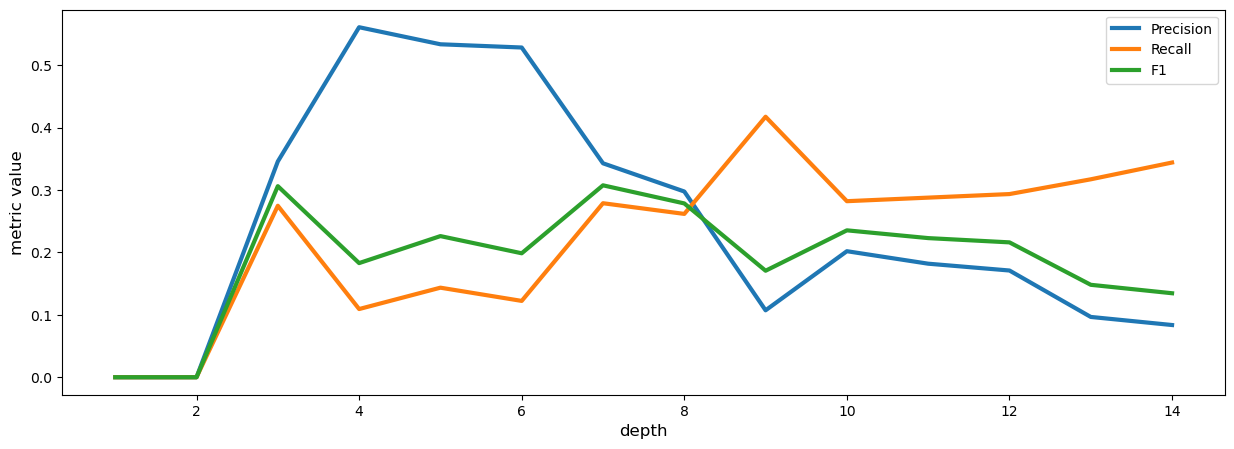

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(depth_list, precision_list, linewidth = 3,label = 'Precision')
ax.plot(depth_list, recall_list, linewidth = 3,label = 'Recall')
ax.plot(depth_list, f1_list, linewidth = 3,label = 'F1')

plt.legend(loc = "upper right")
plt.xlabel('depth',fontsize = 12)
plt.ylabel('metric value',fontsize = 12)
plt.show()

**Когда начинается преобучение**   

Снижение одной метрики сменяется ростом другой, сильно заметное переобучение с глубины 10 



In [123]:
grid = {'max_depth': range(1,12), 'class_weight': [None, 'balanced']}
model_dt = DecisionTreeClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [124]:
gs = GridSearchCV(model_dt, grid, cv = skf, scoring = 'roc_auc')
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': range(1, 12)},
             scoring='roc_auc')

In [131]:
gs.best_params_

{'class_weight': None, 'max_depth': 6}

In [132]:
dtc = DecisionTreeClassifier(
    random_state=42,
    max_depth=6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

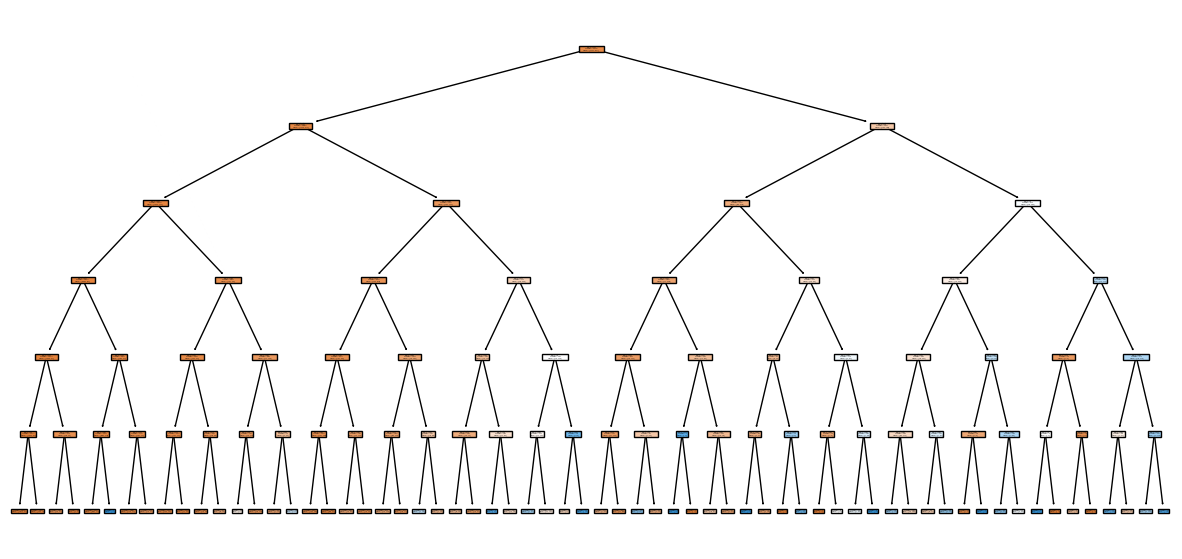

In [133]:
fig = plt.figure(figsize=(15, 7))
tree.plot_tree(dtc, filled=True, feature_names=num_features)
plt.show()

# 2. Bagging

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)

In [33]:
grid_knn = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': range(5,100,10)}
model_knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
gs = GridSearchCV(model_knn, grid_knn, cv = skf, scoring = 'roc_auc', verbose = 3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....algorithm=auto, n_neighbors=5;, score=0.659 total time=   0.7s
[CV 2/5] END .....algorithm=auto, n_neighbors=5;, score=0.648 total time=   0.7s
[CV 3/5] END .....algorithm=auto, n_neighbors=5;, score=0.639 total time=   0.6s
[CV 4/5] END .....algorithm=auto, n_neighbors=5;, score=0.640 total time=   0.6s
[CV 5/5] END .....algorithm=auto, n_neighbors=5;, score=0.659 total time=   0.8s
[CV 1/5] END ....algorithm=auto, n_neighbors=15;, score=0.709 total time=   0.9s
[CV 2/5] END ....algorithm=auto, n_neighbors=15;, score=0.717 total time=   0.9s
[CV 3/5] END ....algorithm=auto, n_neighbors=15;, score=0.698 total time=   0.8s
[CV 4/5] END ....algorithm=auto, n_neighbors=15;, score=0.678 total time=   0.8s
[CV 5/5] END ....algorithm=auto, n_neighbors=15;, score=0.697 total time=   1.0s
[CV 1/5] END ....algorithm=auto, n_neighbors=25;, score=0.720 total time=   1.1s
[CV 2/5] END ....algorithm=auto, n_neighbors=25

[CV 1/5] END ..algorithm=kd_tree, n_neighbors=5;, score=0.659 total time=   0.7s
[CV 2/5] END ..algorithm=kd_tree, n_neighbors=5;, score=0.648 total time=   0.7s
[CV 3/5] END ..algorithm=kd_tree, n_neighbors=5;, score=0.639 total time=   0.6s
[CV 4/5] END ..algorithm=kd_tree, n_neighbors=5;, score=0.640 total time=   0.6s
[CV 5/5] END ..algorithm=kd_tree, n_neighbors=5;, score=0.659 total time=   0.8s
[CV 1/5] END .algorithm=kd_tree, n_neighbors=15;, score=0.709 total time=   0.9s
[CV 2/5] END .algorithm=kd_tree, n_neighbors=15;, score=0.717 total time=   0.9s
[CV 3/5] END .algorithm=kd_tree, n_neighbors=15;, score=0.698 total time=   0.8s
[CV 4/5] END .algorithm=kd_tree, n_neighbors=15;, score=0.678 total time=   0.8s
[CV 5/5] END .algorithm=kd_tree, n_neighbors=15;, score=0.697 total time=   1.0s
[CV 1/5] END .algorithm=kd_tree, n_neighbors=25;, score=0.720 total time=   1.1s
[CV 2/5] END .algorithm=kd_tree, n_neighbors=25;, score=0.729 total time=   1.0s
[CV 3/5] END .algorithm=kd_t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(5, 100, 10)},
             scoring='roc_auc', verbose=3)

In [37]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 85}

In [42]:
grid_bag = {'n_estimators': range(10,100,10)}
knn = KNeighborsClassifier(n_neighbors = 85)
model_bag = BaggingClassifier(estimator = knn, random_state = 42)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
gs_bag = GridSearchCV(model_bag, grid_bag, cv = skf, scoring = 'roc_auc', verbose = 3)
gs_bag.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV 1/4] END ...................n_estimators=10;, score=0.737 total time=  21.0s
[CV 2/4] END ...................n_estimators=10;, score=0.745 total time=  20.1s
[CV 3/4] END ...................n_estimators=10;, score=0.725 total time=  19.9s
[CV 4/4] END ...................n_estimators=10;, score=0.727 total time=  20.9s
[CV 1/4] END ...................n_estimators=20;, score=0.739 total time=  41.7s
[CV 2/4] END ...................n_estimators=20;, score=0.748 total time=  40.1s
[CV 3/4] END ...................n_estimators=20;, score=0.727 total time=  39.5s
[CV 4/4] END ...................n_estimators=20;, score=0.729 total time=  41.5s
[CV 1/4] END ...................n_estimators=30;, score=0.739 total time= 1.0min
[CV 2/4] END ...................n_estimators=30;, score=0.750 total time= 1.0min
[CV 3/4] END ...................n_estimators=30;, score=0.726 total time=  58.8s
[CV 4/4] END ...................n_estimators=30;,

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=85),
                                         random_state=42),
             param_grid={'n_estimators': range(10, 100, 10)}, scoring='roc_auc',
             verbose=3)

In [43]:
gs_bag.best_params_

{'n_estimators': 80}

In [31]:
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred = bagging_knn.predict(X_test)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96     16819
        True       0.41      0.05      0.09      1227

    accuracy                           0.93     18046
   macro avg       0.67      0.52      0.53     18046
weighted avg       0.90      0.93      0.90     18046



# 3. Stacking

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [26]:
grid_lr = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
           'class_weight': [None, 'balanced'], 
          'penalty': ['l2', None]}
model_lr = LogisticRegression(max_iter = 1000)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
gs_lr = GridSearchCV(model_lr, grid_lr, cv = skf, scoring = 'precision')
gs_lr.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1227, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'penalty': ['l2', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='precision')

In [31]:
params = gs_lr.best_params_
params

{'class_weight': None, 'penalty': 'l2', 'solver': 'sag'}

In [25]:
lr = LogisticRegression(solver = 'sag', max_iter = 1000, random_state = 42)
svc = SVC(probability=True, random_state = 42)
knn = KNeighborsClassifier()

In [26]:
estimators = [
    ('lr', lr),
    ('svc', svc),
    ('knn', knn)]
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, n_jobs=-1)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [28]:
y_pred = stacking_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96     16819
        True       0.46      0.06      0.11      1227

    accuracy                           0.93     18046
   macro avg       0.70      0.53      0.54     18046
weighted avg       0.90      0.93      0.91     18046



Увеличилась точность определения положительного класса

# 4. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                random_state=42,  
                               class_weight='balanced'
                              )
model.fit(X_train, y_train)
y_approx = model.predict(X_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.23      0.37     16819
        True       0.08      0.96      0.15      1227

    accuracy                           0.28     18046
   macro avg       0.54      0.59      0.26     18046
weighted avg       0.93      0.28      0.35     18046



In [40]:
f1_score(y_test, y_pred)

0.15276967930029156

In [41]:
grid_rf = {'max_depth': range(5,11), 
           'max_features': ['sqrt', 'log2', None],
           'n_estimators': range(100, 500, 50),
          #'min_samples_split': range(2,12,2)
          }
model_rf = RandomForestClassifier(random_state = 42)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [45]:
gs_rf = GridSearchCV(model_rf, grid_rf, cv = skf, scoring = 'f1', n_jobs = -1)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 11),
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1')

In [46]:
gs_rf.best_params_

{'max_depth': 10, 'max_features': None, 'n_estimators': 300}

In [47]:
y_pred = gs_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.98      0.96     16819
        True       0.36      0.17      0.24      1227

    accuracy                           0.92     18046
   macro avg       0.65      0.58      0.60     18046
weighted avg       0.90      0.92      0.91     18046



Все метрики существенно улучшились

# XGBoost

In [48]:
import xgboost as xgb

In [55]:
grid_xgb = {
    'max_depth': range(2,7),                 # Глубина деревьев
    'learning_rate': [0.01, 0.1, 0.5, 0.8],        # Скорость обучения
    'n_estimators': range(100, 501, 100),
    'colsample_bytree': [0.8, 1.0],            # Доля признаков, используемых для обучения каждого дерева
}

# Инициализация модели XGBoost
model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=grid_xgb, cv=skf, scoring='f1', n_jobs=-1, verbose = 3)

In [56]:
grid_search_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.5, 0.8],
                         'max_depth': range(2, 7),
                         'n_estimators': range(100, 501, 100)},
             scoring='f1', verbose=3)

In [57]:
grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.8,
 'max_depth': 6,
 'n_estimators': 200}

In [58]:
y_pred = grid_search_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.90      0.92     16819
        True       0.13      0.19      0.15      1227

    accuracy                           0.85     18046
   macro avg       0.53      0.55      0.54     18046
weighted avg       0.88      0.85      0.87     18046



In [60]:
params = grid_search_xgb.best_params_

In [62]:
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
f_score = model.get_booster().get_score(importance_type='weight')
print(f_score)

{'f0': 1581.0, 'f1': 1529.0, 'f2': 1625.0, 'f3': 1665.0, 'f4': 950.0, 'f5': 278.0, 'f6': 356.0, 'f7': 336.0, 'f8': 139.0}
